In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import HTML

In [2]:
file_name = 'smiles.csv'
with open(file_name, "r") as ins:
    smiles = []
    for line in ins:
        smiles.append(line.split('\n')[0])
print('# of SMILES:', len(smiles))

# of SMILES: 10


['smiles', 'C=C', 'C=O', 'C#N', 'CCO', 'CCC(=O)O', 'CN=C=O', 'C1=CCC=CC1', 'C1=CC=CC=C1', 'C1=C(C)C=CC=C1']


[15:45:32] SMILES Parse Error: syntax error while parsing: smiles
[15:45:32] SMILES Parse Error: Failed parsing SMILES 'smiles' for input: 'smiles'


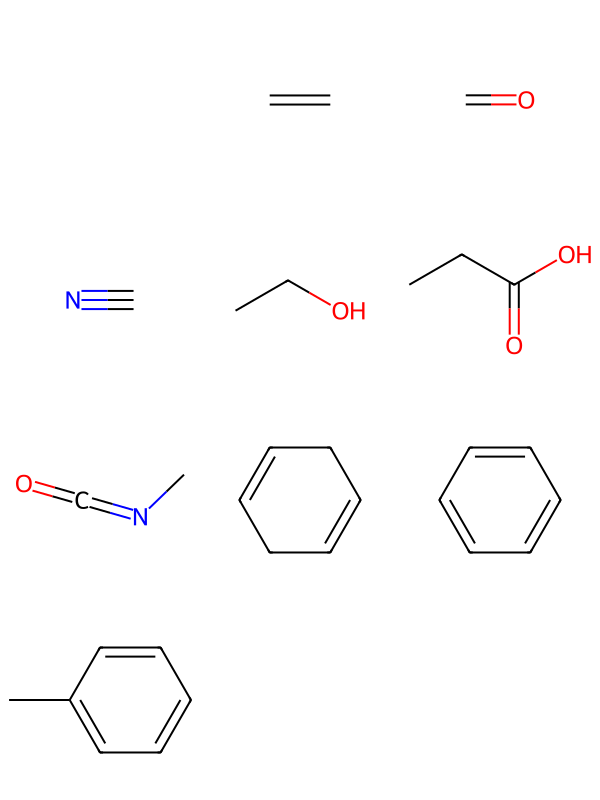

In [3]:
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
print(smiles)
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 200))

In [4]:
import pandas as pd
from rdkit.Chem import PandasTools

In [5]:
opt_data = pd.read_csv(file_name)
opt_data.head(10)

,smiles
0,C=C
1,C=O
2,C#N
3,CCO
4,CCC(=O)O
5,CN=C=O
6,C1=CCC=CC1
7,C1=CC=CC=C1
8,C1=C(C)C=CC=C1


,smiles,ROMol
0,C=C,
1,C=O,
2,C#N,
3,CCO,
4,CCC(=O)O,
5,CN=C=O,
6,C1=CCC=CC1,
7,C1=CC=CC=C1,
8,C1=C(C)C=CC=C1,

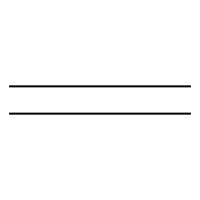
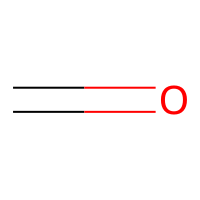
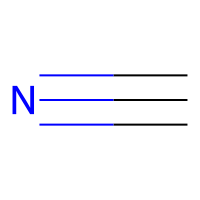
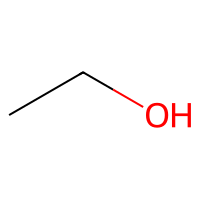
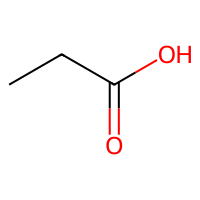
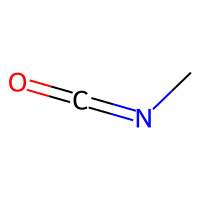
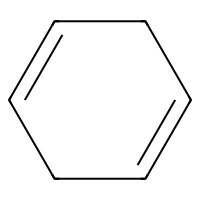
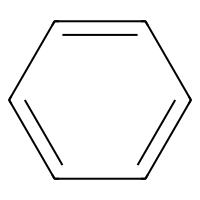
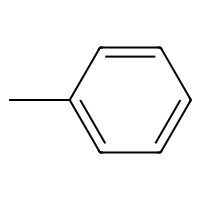

In [6]:
PandasTools.AddMoleculeColumnToFrame(opt_data, smilesCol='smiles')
opt_data.head(10)
def show_df(df):
    return HTML(df.to_html(notebook=True))
show_df(opt_data)

,smiles,ROMol,n_Atoms
0,C=C,,2
1,C=O,,2
2,C#N,,2
3,CCO,,3
4,CCC(=O)O,,5
5,CN=C=O,,4
6,C1=CCC=CC1,,6
7,C1=CC=CC=C1,,6
8,C1=C(C)C=CC=C1,,7

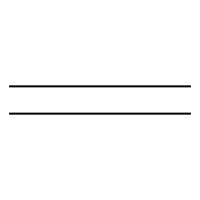
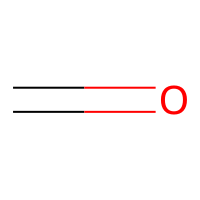
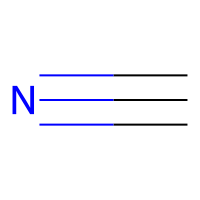
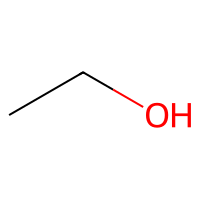
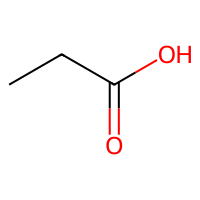
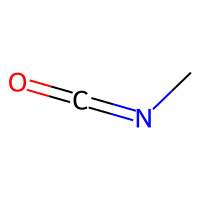
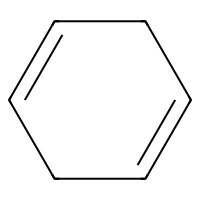
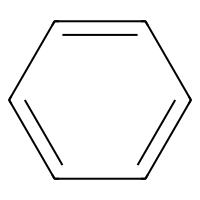
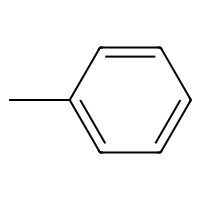

In [7]:
opt_data["n_Atoms"] = opt_data['ROMol'].map(lambda x: x.GetNumAtoms())
show_df(opt_data)

In [8]:
from psikit import Psikit
pk = Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [9]:
print(opt_data)

           smiles                                             ROMol  n_Atoms
0             C=C  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23820>        2
1             C=O  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23580>        2
2             C#N  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b239e0>        2
3             CCO  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23a50>        3
4        CCC(=O)O  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23ac0>        5
5          CN=C=O  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23b30>        4
6      C1=CCC=CC1  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23ba0>        6
7     C1=CC=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23c10>        6
8  C1=C(C)C=CC=C1  <rdkit.Chem.rdchem.Mol object at 0x7f5ff8b23c80>        7


In [10]:
# use psikit to optimize each smiles string and add the energy to the dataframe
%time
all_energy = []
pk = Psikit(debug=True,threads=1,memory=8)
for i in opt_data["smiles"]:
    print(i)
    pk.read_from_smiles(i)
    energy_opt = pk.optimize()
    print(energy_opt)
    all_energy.append(energy_opt)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
C=C
Optimizer: Optimization complete!
-78.03876941254534
C=O
Optimizer: Optimization complete!
-113.86953646696564
C#N
Optimizer: Optimization complete!
-92.87694247778018
CCO
Optimizer: Optimization complete!
-154.08991870722093
CCC(=O)O
Optimizer: Optimization complete!
-266.8589851578191
CN=C=O
Optimizer: Optimization complete!
-206.79559264403252
C1=CCC=CC1
Optimizer: Optimization complete!
-231.84676156727264
C1=CC=CC=C1
Optimizer: Optimization complete!
-230.71352354226508
C1=C(C)C=CC=C1
Optimizer: Optimization complete!
-269.75355216648376


,smiles,ROMol,n_Atoms,energy
0,C=C,,2,-78.038769
1,C=O,,2,-113.869536
2,C#N,,2,-92.876942
3,CCO,,3,-154.089919
4,CCC(=O)O,,5,-266.858985
5,CN=C=O,,4,-206.795593
6,C1=CCC=CC1,,6,-231.846762
7,C1=CC=CC=C1,,6,-230.713524
8,C1=C(C)C=CC=C1,,7,-269.753552

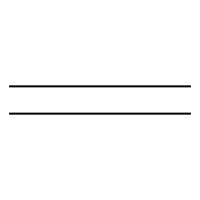
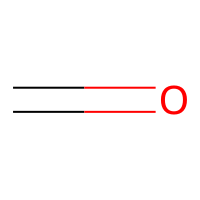
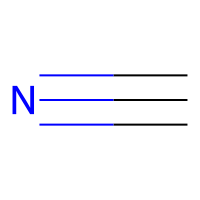
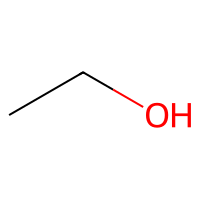
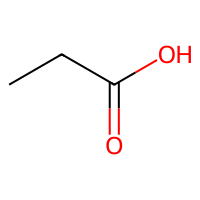
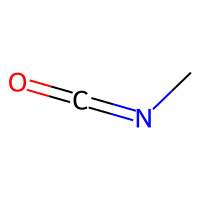
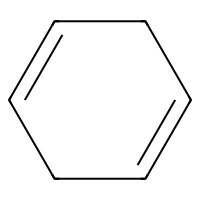
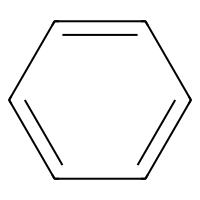
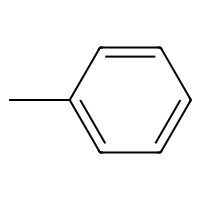

In [11]:
opt_data['energy'] = all_energy
show_df(opt_data)